In [44]:
%matplotlib inline


In [1]:
def main():
    filename = '/media/ab/data/Research_Data/SRR930649_fullModel-11_K_models_MLE.tsv'
    x = import_data_from_file(filename)
    for line in x:
        print line    
    
def import_data_from_file(filename):
    # This function opens a file from the disk. It returns the raw data.
    try:
        return open(filename)
    except IOError:
        print "Unable to open file: %s" %(filename)
        

In [74]:
#filename = '/media/ab/data/Research_Data/test.tsv'
#filename = '/media/ab/data/Research_Data/SRR930649_fullModel-11_K_models_MLE.tsv'


In [75]:
x=open(filename)
data = []

In [76]:
position = dict()
for line in x:
    #if line[0] is not '#':
    #print line
    if line[0] is '>':
        #print line
        position['name'] = line.split('|')[0][1:].strip('\n')
        position['chromosome'] = (line.split('|')[1]).split(':')[0].strip('\n')
        position['start'] = ((line.split('|')[1]).split(':')[1]).split('-')[0].strip('\n')
        position['end'] = ((line.split('|')[1]).split(':')[1]).split('-')[1].strip('\n')
        position['for_cov'] = (line.split('|')[2]).split(',')[0].strip('\n')
        position['rev_cov'] = (line.split('|')[2]).split(',')[1].strip('\n')
    if line[0] is '~' and line[1] is '1':
        #print line
        model_1 = dict()
        model_1['log-likelihood'] = (line.split('\t')[0]).split(',')[1].strip('\n')
        model_1['mu_k'] = line.split('\t')[1].strip('\n')
        model_1['sigma_k'] = line.split('\t')[2].strip('\n')
        model_1['lambda_k'] = line.split('\t')[3].strip('\n')
        model_1['pi_k'] = line.split('\t')[4].strip('\n')
        model_1['fp_k'] = line.split('\t')[5].strip('\n')
        model_1['w_[p,k]'] = (line.split('\t')[6]).split(',')[0].strip('\n')
        model_1['w_[f,k]'] = (line.split('\t')[6]).split(',')[1].strip('\n')
        model_1['w_[r,k]'] = (line.split('\t')[6]).split(',')[2].strip('\n')
        model_1['b_[f,k]'] = line.split('\t')[7].strip('\n')
        model_1['a_[r,k]'] = line.split('\t')[8].strip('\n')        
        position['model_1'] = model_1
        data.append(position)
        position = dict()
#print model_1
#print data

In [77]:
lambda_ = []
sigma = []
mu = []

for i in data:
    lambda_.append(float(i['model_1']['lambda_k']))
    sigma.append(float(i['model_1']['sigma_k']))
    mu.append(float(i['model_1']['mu_k']))

#print "lambda: ", lambda_
#print "sigma: ", sigma
#print "mu: ", mu

In [37]:
tss_count = len(lambda_)
print tss_count

29255


min:  125517.872793
max:  195240923.146
num_bins:  292


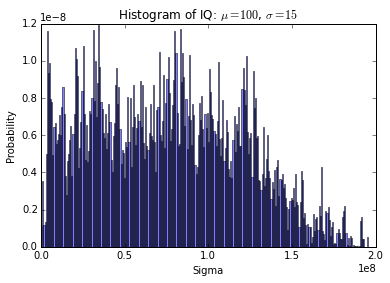

In [45]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

#sigma = [4,6,7,3,5,7,5,3,7,9,6,37,3,5,3]
# example data
#mu = 100  # mean of distribution
#sigma = 15  # standard deviation of distribution
x = mu
print "min: ", min(x)
print "max: ", max(x)
#print x
#x = [68.395382, 17.030365, 70.130632, 24.006091, 24.539265]
#x = mu + sigma * np.random.randn(50)
#print "x: ", x
num_bins = len(x) / 100
print "num_bins: ", num_bins
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)
# add a 'best fit' line
#y = mlab.normpdf(bins, mu, sigma)
#plt.plot(bins, y, 'r--')
plt.xlabel('Sigma')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
#plt.subplots_adjust(left=0.15)
plt.show()

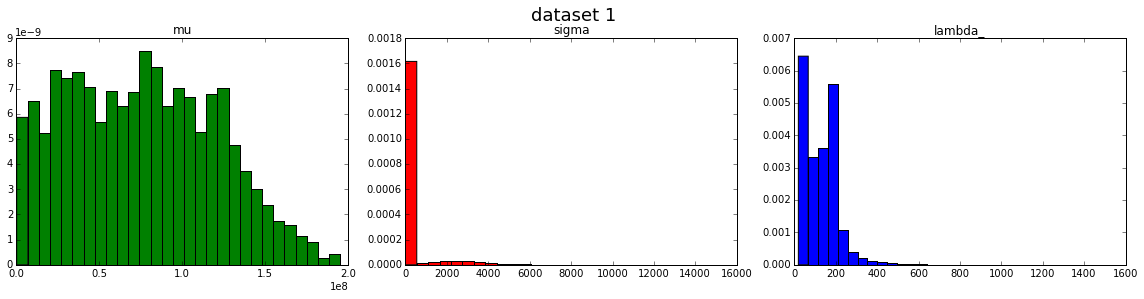

In [93]:
"""
Histogram of mu, sigma, lambda

"""
import numpy as np
import matplotlib.pyplot as plt

x1 = mu
x2 = sigma
#x3 = lambda_

x3 = []
for i in lambda_:
    if i != (np.inf):
        x3.append(i)
#print sorted(x3)


x1_bins = len(mu) / 1000
x2_bins = len(sigma) / 1000
x3_bins = len(lambda_) / 1000

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 4))

ax1.hist(x1, x1_bins, normed=1, histtype='bar', facecolor='g')
ax1.set_title('mu')
ax2.hist(x2, x2_bins, normed=1, histtype='bar', facecolor='r')
ax2.set_title('sigma')
ax3.hist(x3, x3_bins, normed=1, histtype='bar', facecolor='b')
ax3.set_title('lambda_')
fig.suptitle("dataset 1", y=1.02, fontsize=18)

# Create a histogram by providing the bin edges (unequally spaced).
#bins = [100, 150, 180, 195, 205, 220, 250, 300]
#ax1.hist(x, bins, normed=1, histtype='bar', rwidth=0.8)
#ax1.set_title('unequal bins')

plt.tight_layout()
plt.show()

In [79]:
import numpy as np
print "min: ", min(lambda_)
print "max: ", max(lambda_)
z = []
for i in lambda_:
    if i != (np.inf):
        z.append(i)
#print sorted(z)


min:  20.0
max:  inf


In [71]:
print np.inf

inf


In [89]:
#import os
dir_list = os.listdir('/media/ab/data/Research_Data/')
for j in dir_list:
    if j[-4:] == '.tsv':
        print j

SRR930649_fullModel-11_K_models_MLE.tsv
test.tsv


In [29]:
import numpy as np
in_list = [4, 5, -2, 8, 2, float('inf'), 6, 12, -float('inf')]
print in_list
out_list = []
max_num = 0
min_num = 0
for i in in_list:
    if i != float('inf') and i > max_num:
        max_num = i
    if -i != float('inf') and i < min_num:
        min_num = i
        
print max_num
print min_num

for i in in_list:
    if i == (float('inf')):
        out_list.append(max_num)
    elif -i == (np.inf):
        out_list.append(min_num)  
    else:
        out_list.append(i)
        
print "infinites removed"        
print out_list



[4, 5, -2, 8, 2, inf, 6, 12, -inf]
12
-2
infinites removed
[4, 5, -2, 8, 2, 12, 6, 12, -2]


In [13]:
x = [float("inf")]
print x[0] == float("inf")

True
